<a href="https://colab.research.google.com/github/Dimildizio/DS_course/blob/main/gradient-descent/HomeWork3_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа 3
## Математическая оптимизация

В этом домашнем задании вам предстоит найти минимум функции используя метод `RMSProp`.

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

### Вам дана функция $y(x) = x^{3} \ln(x)$

1. Выпишите вид производной этой функции ($y'(x)$). (можно сделать это в виде latex кода, добавления картинки или записью кода python)


 $$ y'(x)= 3x^2ln(x) + x^2 $$

In [279]:
derive_me = lambda x: 3 * x**2 * np.log(x) + x**2

2. Реализуйте функцию `dy(...)` в ячейке ниже, которая на вход принимает $x_0$, а на выходе возвращает значение производной функции $y(x)$ в точке $x_0$ (то есть $y'(x_0)$).

In [ ]:
def dy(x):
    """
    Реализуйте функцию
    """
    return derive_me(x)

3. Реализуйте функцию `get_min_with_gd(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

In [291]:
def update_rule(weight_vector, gradient, lr):
  '''Создает правило по которому обновляются значния в сторону минимума
  В нашем случае это шаг обучения * на производную / эвклидово расстояние 
  текущего градиента по каждой точке что мы передали в начале'''
  result = lr * gradient / np.linalg.norm(gradient)
  return result

In [479]:
def get_min_with_gd(x_0, learn_rate=0.001, threshold=0.0001, n_iters=1500):
    """
    Реализуйте функцию
    """
    #стартовые точки что обновляются в формате [w - update_rule]
    w = np.array(x_0) 
    #запись каждого шага в формате [шаг1:[точка1.1, ...], шаг2: точка2.1, ...].  
    history = [w]       

    #шкала заполнения
    for num in tqdm(range(n_iters)):                   
      #Core magic = derivative+update weights
      grad = derive_me(w)
      #обновляем значение параметров. идем по антиградиенту вниз к минимуму 
      w = w - update_rule(w, grad, learn_rate)
      #пишем значения на этом шаге
      history.append(w)

      #стоп когда медленно начинает обучаться
      if np.mean(abs(w - history[-2])) < threshold: 
        print('stop step', w)
        break
      
    return np.array(history)     

In [477]:
# Запустите поиск минимума с любой точки, например с точки 10
history = get_min_with_gd([10], n_iters = 300000)


  0%|          | 0/300000 [00:00<?, ?it/s]

4. Проверьте, что все работает ожидаемым образом, запустив ячейку ниже

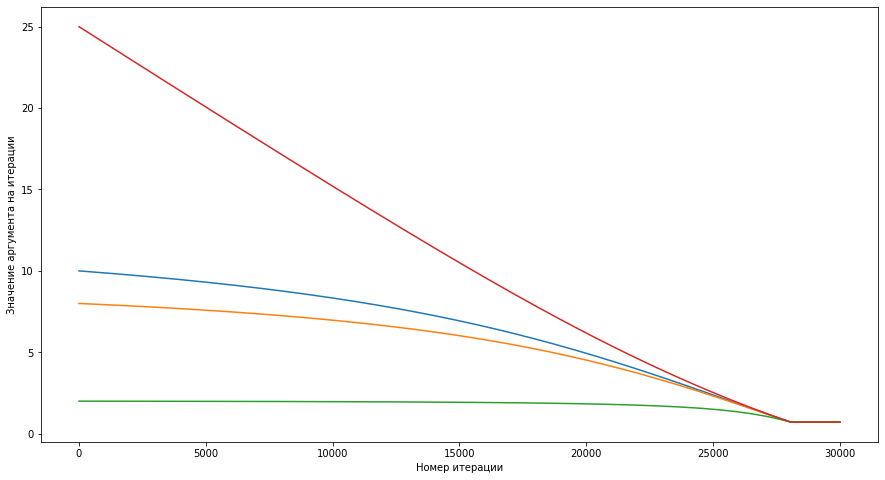

In [427]:
plt.figure(figsize=(15, 8))

# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history)

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

Проверим разные размеры шага обучения и порога на одном и том же количестве итераций.

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

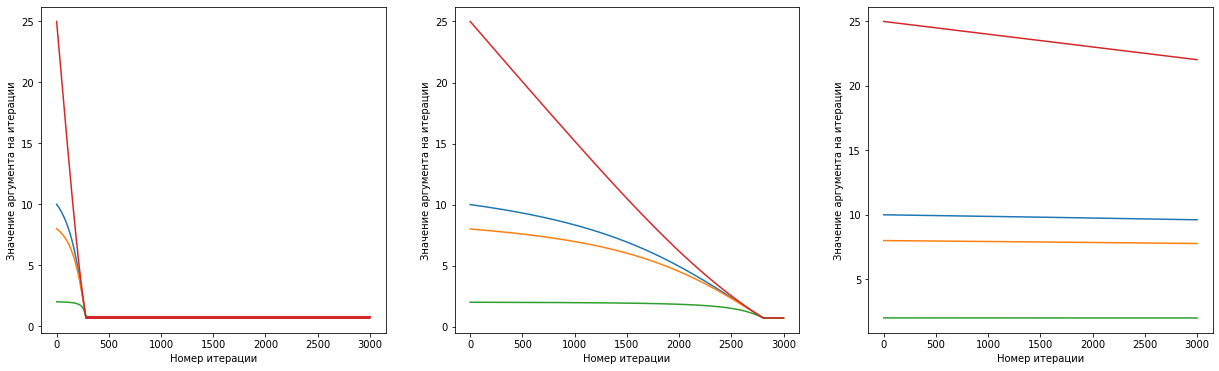

In [482]:
values = [10, 8, 2, 25]
fig, ax = plt.subplots(1,3,figsize=(21, 6))

for x in range(3):
  my_history = get_min_with_gd(values, learn_rate = 10**-(x+1), threshold = 10**-(x+2), n_iters = 3000)
  ax[x].plot(my_history)
  ax[x].set_xlabel('Номер итерации')
  ax[x].set_ylabel('Значение аргумента на итерации')
plt.show()


  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

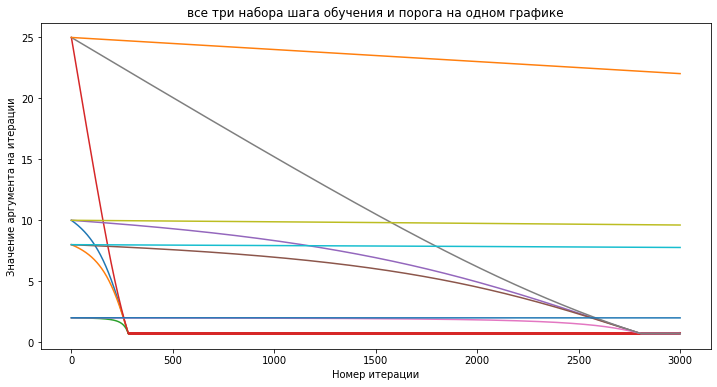

In [488]:
plt.figure(figsize = (12,6))
for x in range(3):
  my_history = get_min_with_gd(values, learn_rate = 10**-(x+1), threshold = 10**-(x+2), n_iters = 3000)
  plt.plot(my_history)#, label = 'спуск')
plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.title('все три набора шага обучения и порога на одном графике')
#plt.legend()
plt.show()


5. Реализовать поиск минимума при помощи алгоритма `RMSProp`. Реализуйте функцию `get_min_with_rmsprop(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr, $β$ и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

Напомним как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$

Здесь $α$ -- learning rate, $ɛ$ -- малое число (можно взять 0.0001 -- оно нужно, чтобы случайно не было деления на 0), $\beta$ -- мера учета инерции

In [490]:
def rmsprop(start, grad_fn, learn_rate = 0.001, beta=0.9, eps = 1e-8, threshold = 0.0001, n_iter = 1350):
  #конвертируем в нампай и добавим значениям очень маленькое число если у нас 0
  w = np.array(start) + eps

  #создаем список оптимизированных переменных добавляемых с каждым шагом
  history = [w]
  #на каждом шаге будем заносить результат производных по каждым w в список
  f_values = [grad_fn(w)]

  #создадим матрицу для скользящего среднего градиента^2 в форме w. заполним нулями 
  gamma = np.zeros_like(w)

  #прогрес бар и дальше вся магия
  for n in tqdm(range(n_iter)):
    #подсчитываем производные для значений в массиве параметров
    grad = grad_fn(w)
    #обновляем гамму - матрицу скользящего среднего для градиентов**2 
    #бета( важность градиента в рамках сколязещего среднего - 0.9)
    #гамма = (1-бета) * гамму + бета * градиенты^2 
    gamma = (1 - beta) * gamma + beta * np.square(grad)
    
    #Создаем шаг на который спускаться по антиградиенту 
    # шаг обучения / (гамма+эпсилон(нужен если гамма=0))**0.5 * градиент  
    update = (learn_rate / np.sqrt(gamma + eps)) * grad
    #от текущего массива парамитров отнимаем шаг
    w = w - update
    
    #Добавляем новый градиент в список чтоб потом отразить на графике
    f_values.append(grad_fn(w))
    #также добавляем текущее состояние векторов в список 
    history.append(w)
    
    #проверяем не слишком ли малой стала разница, чтоб прервать лишние итерации
    if np.mean(abs(w - history[-2])) < threshold:
      print('stop:', w-history[-2], '<', threshold)
      break
  return history, f_values


In [491]:
# Запустите поиск минимума с нескольких точек, например с 0 и 2

history_rmsprop_1 = rmsprop([0], derive_me)   
history_rmsprop_2 = rmsprop([2], derive_me)

  0%|          | 0/1350 [00:00<?, ?it/s]

stop: [5.42620422e-14] < 0.0001


  0%|          | 0/1350 [00:00<?, ?it/s]

6. Нарисовать график, на котором отображен реальный минимум функции и все точки, которые были получены на каждом шаге RMSProp алгоритма.

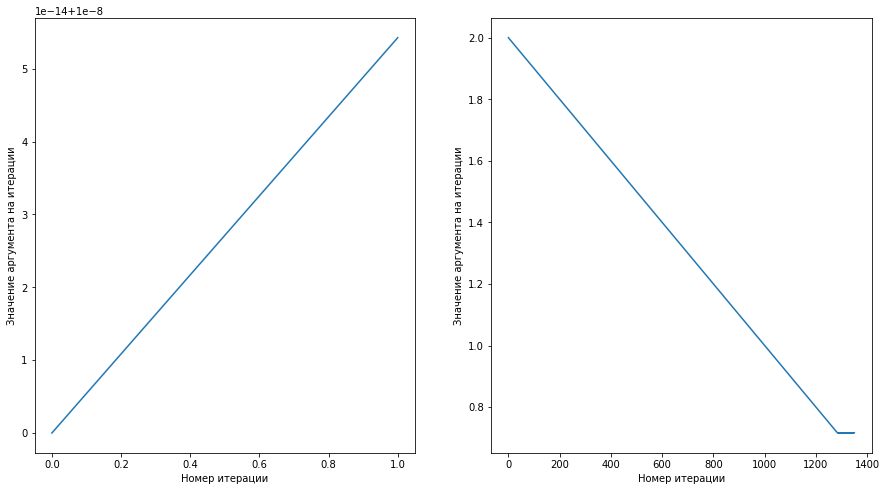

In [399]:
# Ваш код тут
fig, ax = plt.subplots(1,2,figsize = (15,8))
#plt.figure(figsize=(15, 8))
hs = [history_rmsprop_1, history_rmsprop_2]
# Отрисуем то, как менялись координаты в процессе поиска минимума
for x in range(2):
  ax[x].plot(hs[x][0])
  ax[x].set_xlabel('Номер итерации')
  ax[x].set_ylabel('Значение аргумента на итерации')
plt.show()

Точка экстремума у нас в 1. Где функция меняет знаек поскольку в формул производной у нас умножение на ln(x). 

ln(1.0001) даст предельно малое число, а ln(0.99999) - уже отрицательные числа.
Стоит заметить, что похоже, что чем больше число, тем на большее расстояние он спускается. Длинна спуска от значения 5 больше чем 2.85 или 1.1.

  0%|          | 0/1500 [00:00<?, ?it/s]

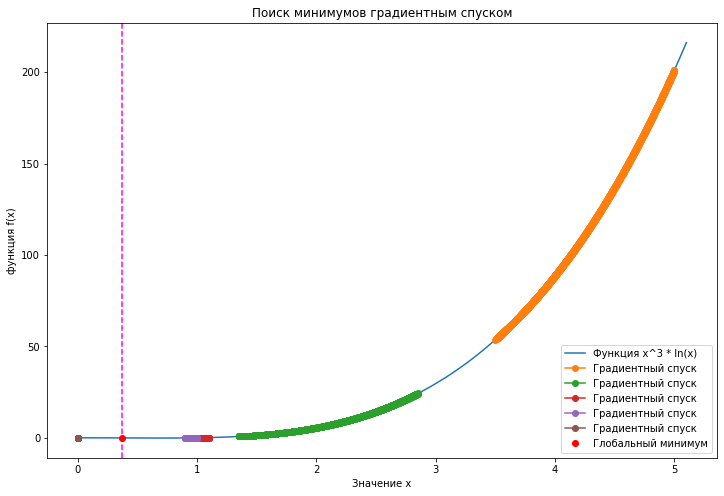

In [396]:
plt.figure(figsize = (12,8))
#наша функция
def f(x):
    return x**3 * np.log(x)

#поскольку у нас есть log(x), что переворачивает функцию у 1, то минимум у нас будет при х = 1/e. 
xmin = 1/np.exp(1)
#найдем этот минимум
fmin = f(xmin)

#выберем значения близкие точке экстремума
start = [5, 2.85, 1.1, 0.9, 0]
history, f_values = rmsprop(start, grad_fn=f, n_iter=1500)

#создадаим множство точек
x = np.linspace(0.01, 5.1, 100)
#это наша функция на всех созданных точках от 0.01 до 3
plt.plot(x, f(x), label='Функция x^3 * ln(x)')
#это результаты из значений нашего градиента 
plt.plot(history, f_values, 'o-', label='Градиентный спуск')
#Это наш глобальный минимум
plt.axvline(x=xmin, color='magenta', linestyle='--')
plt.plot(xmin, fmin, 'ro', label='Глобальный минимум')
plt.ylabel('функция f(x)')
plt.xlabel('Значение x')
plt.title('Поиск минимумов градиентным спуском')
plt.legend()
plt.show()